In [3]:
#Import Libararies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import Excel File

import pandas as pd
df=pd.read_excel(r'C:\Users\shaik mahaboob basha\Downloads\House Prediction Data - Project 2.xlsx')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [5]:
#Shape of Dataset

df.shape

(1168, 81)

In [7]:
#Dataset Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [10]:
#Data Type

df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [11]:
#Describe Dataset


df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Exploratory Data Ananlysis

In [12]:
#Columns With Object Data Type
df.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [13]:
#Columns With Int Data Type
df.select_dtypes(include=['int64']).columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [14]:
# check train column types

Column_type = df.dtypes.reset_index()
Column_type.columns = ["Count", "Column Type"]
Column_type.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,35
1,float64,3
2,object,43


In [20]:
#Univariant Ananlysis of Categorical Data

In [15]:
categorical_data = df.select_dtypes(include=['object']).columns

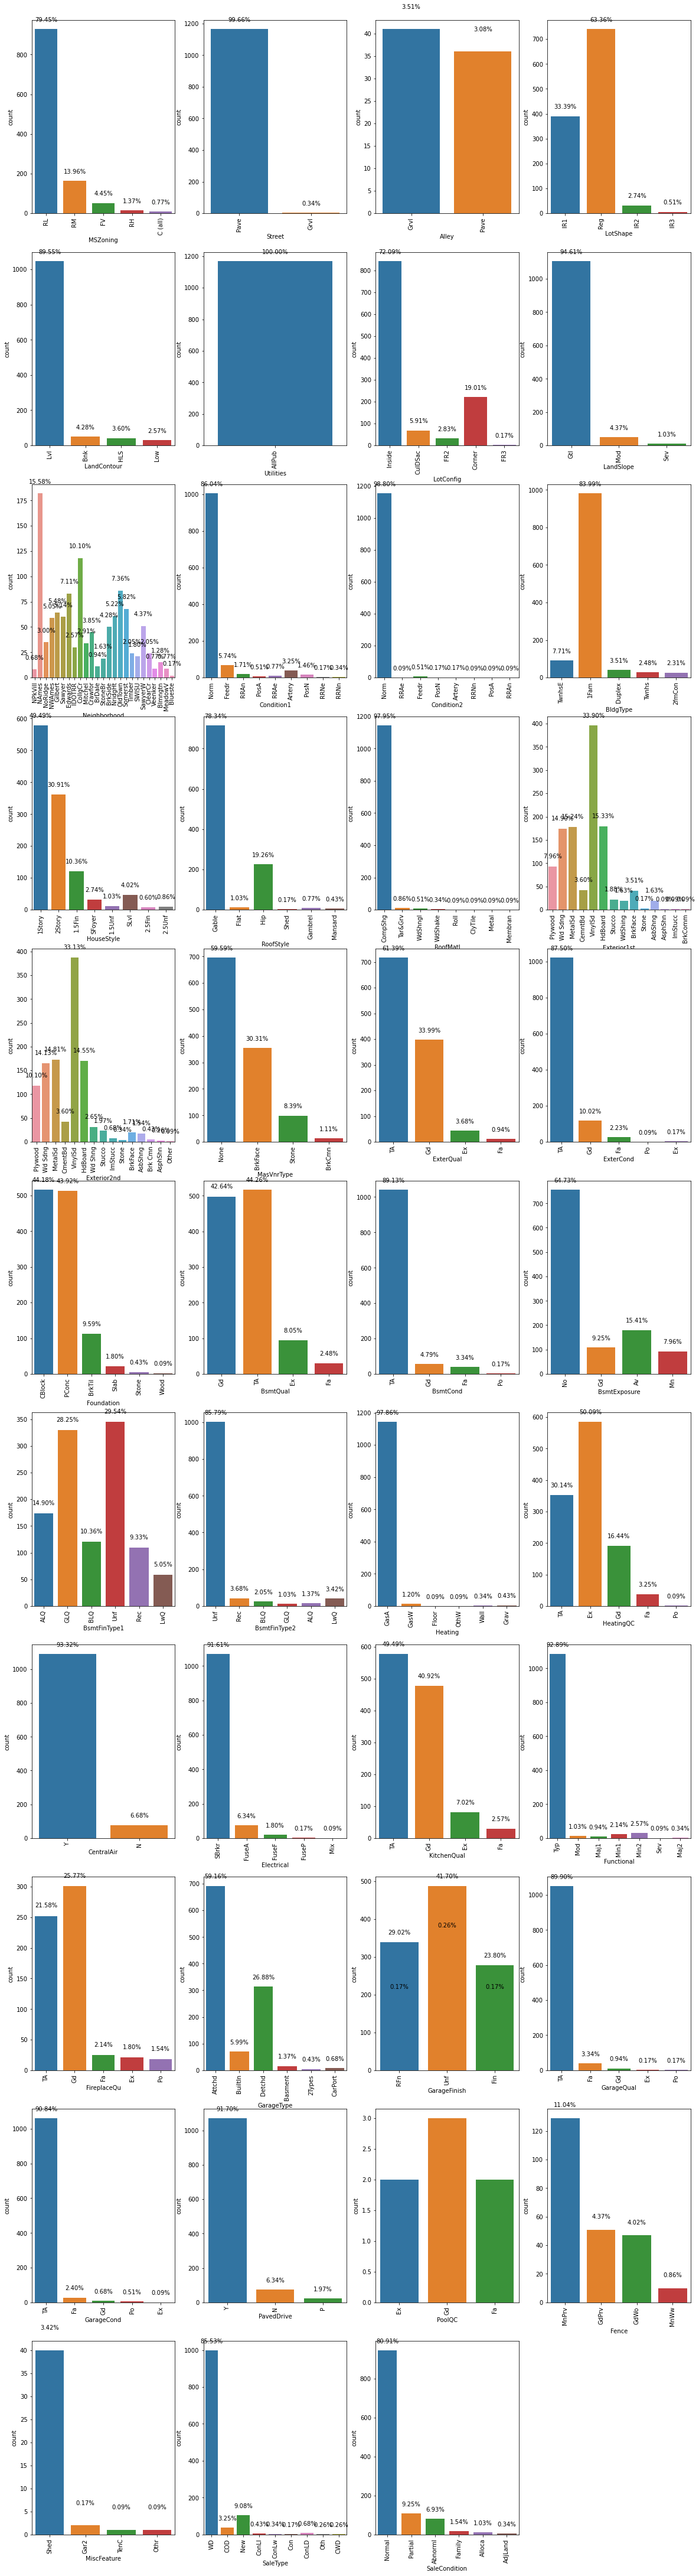

In [18]:
plt.figure(figsize=(20, 100))
for i in enumerate(categorical_data): 
    ax = plt.subplot(14,4, i[0]+1)
    plt.subplots_adjust(wspace = 0.2, hspace = 0.20)
    plt.xticks(rotation="vertical")
    sns.countplot(x=i[1], data=df)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%\n'.format(100 * height/len(df)),
                ha="center")

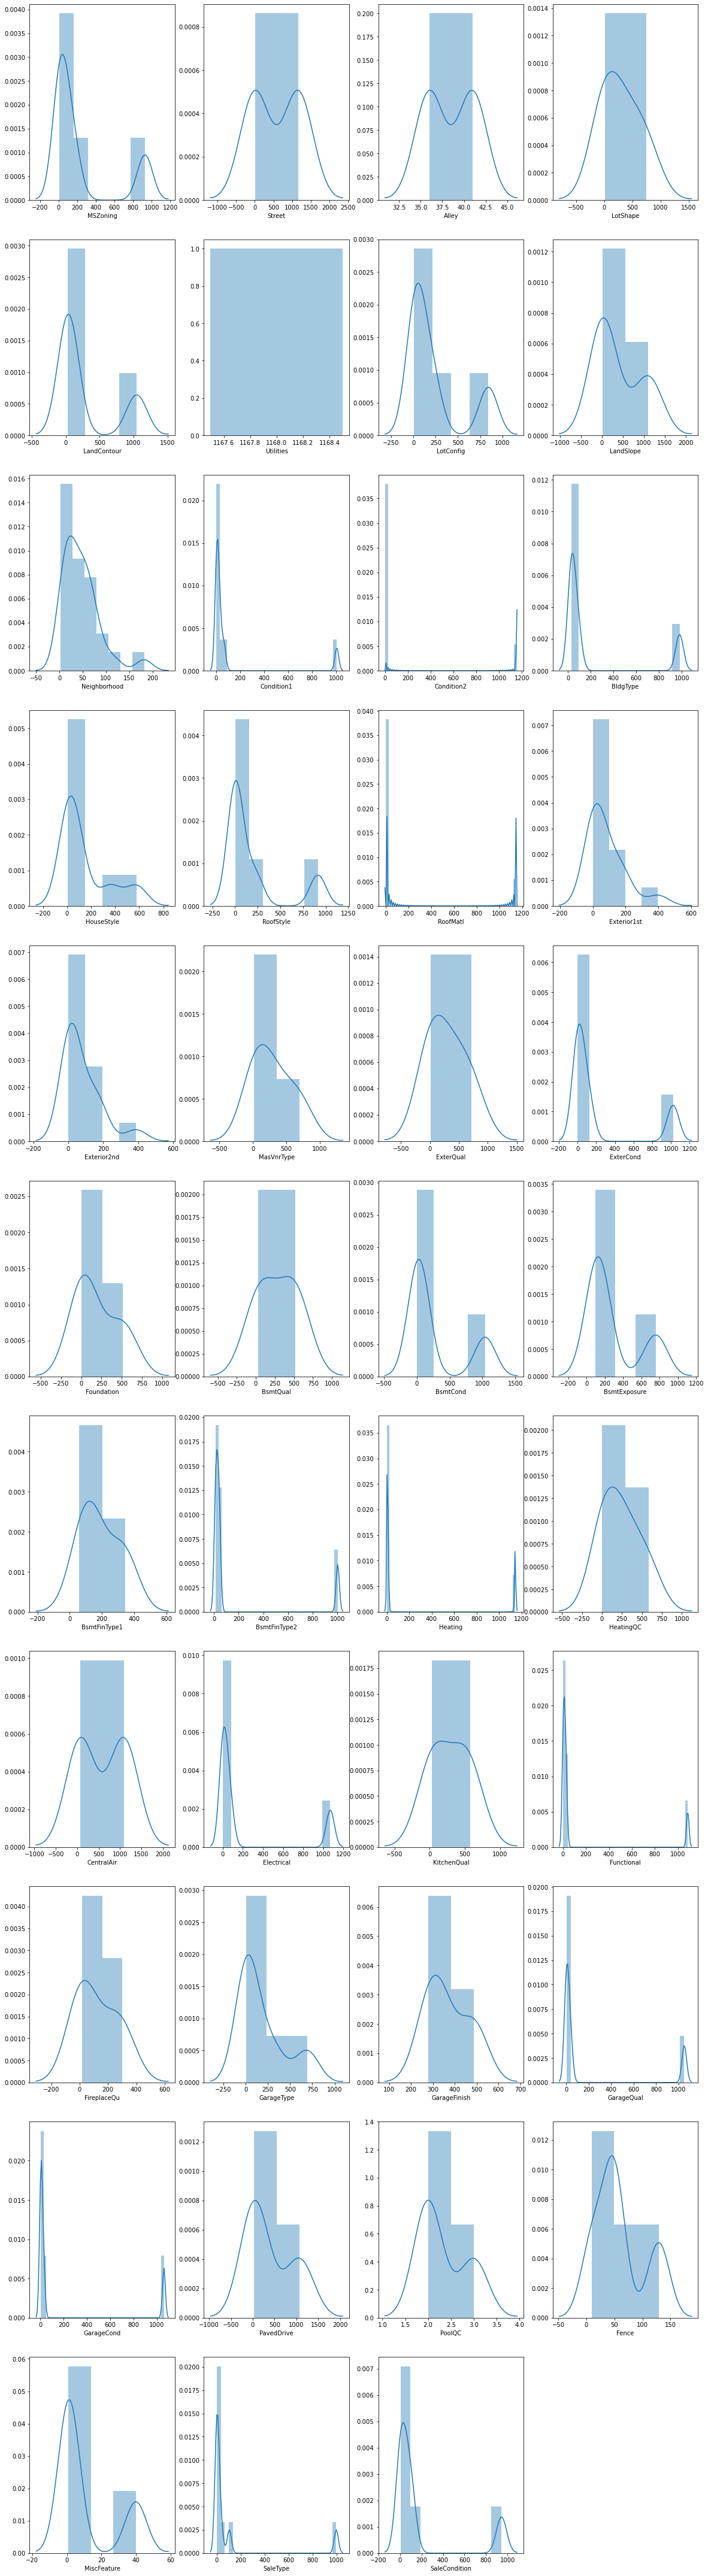

In [19]:
plt.figure(figsize=(20,100))
for i in enumerate(categorical_data): 
    ax = plt.subplot(14,4, i[0]+1)
    sns.distplot(df[i[1]].value_counts())


In [21]:
#Univariant Analysis for Numercial Data

In [23]:
datatypes = df.dtypes
numerical_data = list(datatypes[datatypes != 'object'].index)
numerical_data

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [24]:
# Drop 'ID' from the list as it is a unique value identifier
numerical_data.pop(0)

'Id'

In [25]:
df[numerical_data].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,46.647260,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,163.520016,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


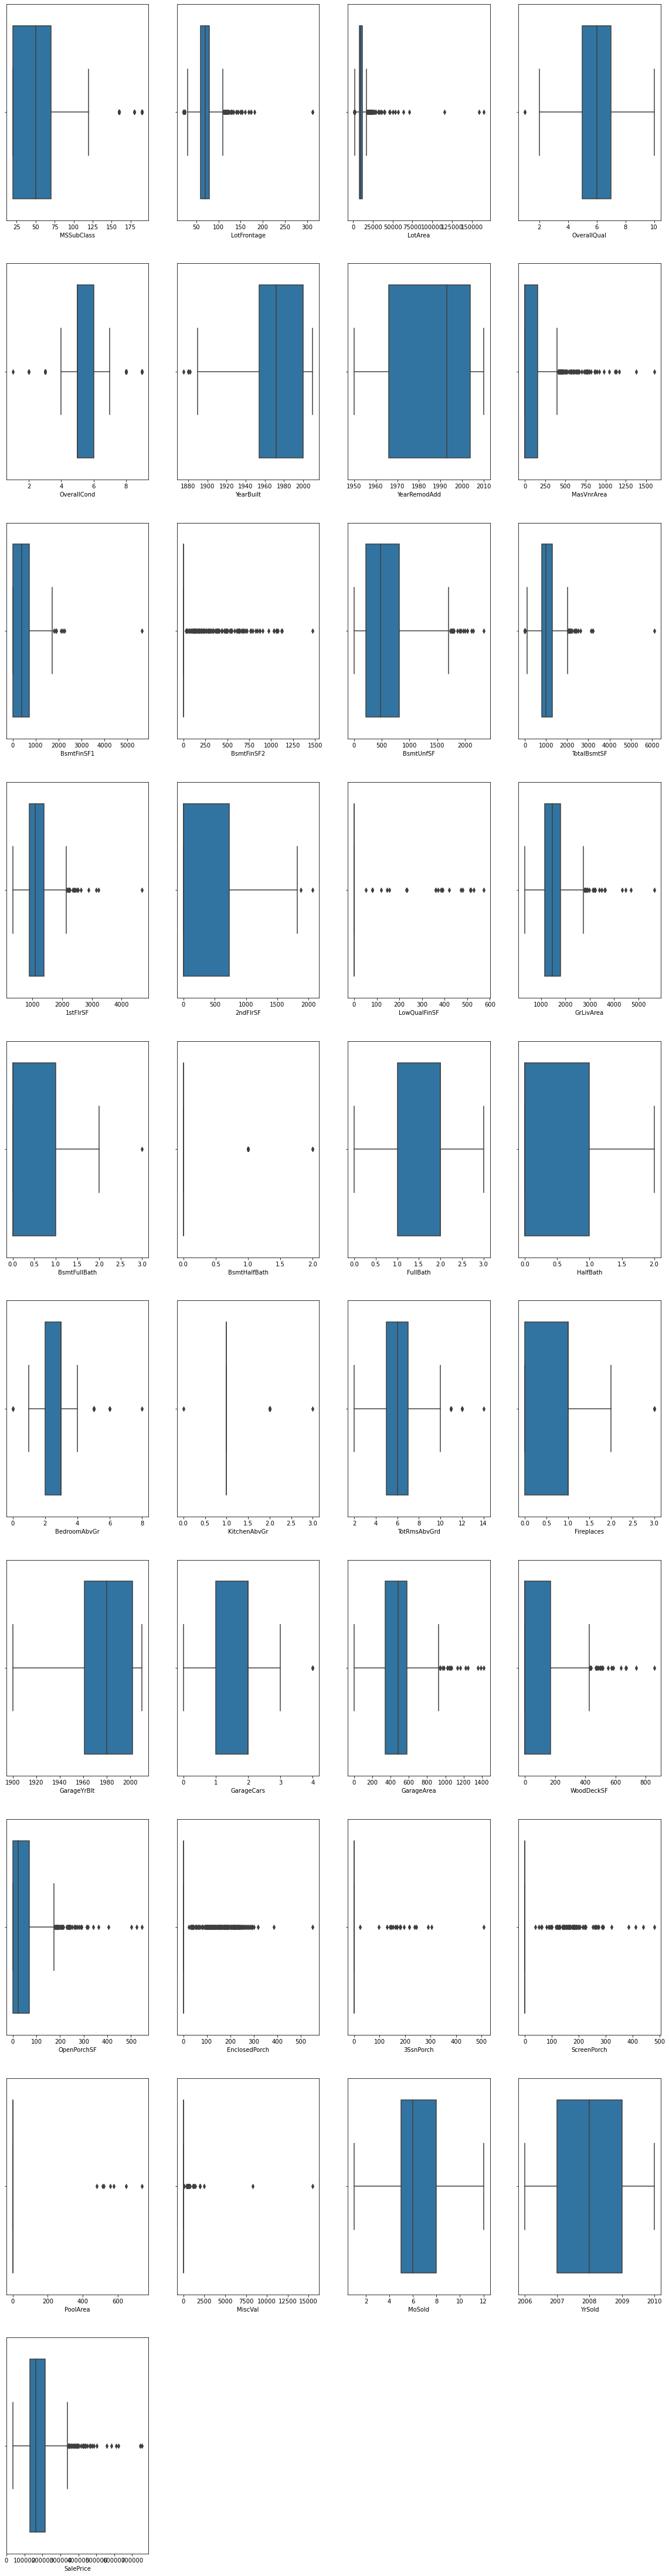

In [28]:
plt.figure(figsize = (20,80))
for i in enumerate(numerical_data): 
    ax = plt.subplot(10,4, i[0]+1)
    sns.boxplot(df[i[1]])

Bi-Variant Ananlysis of Categorical Variable Against Target Variable SalesPrice

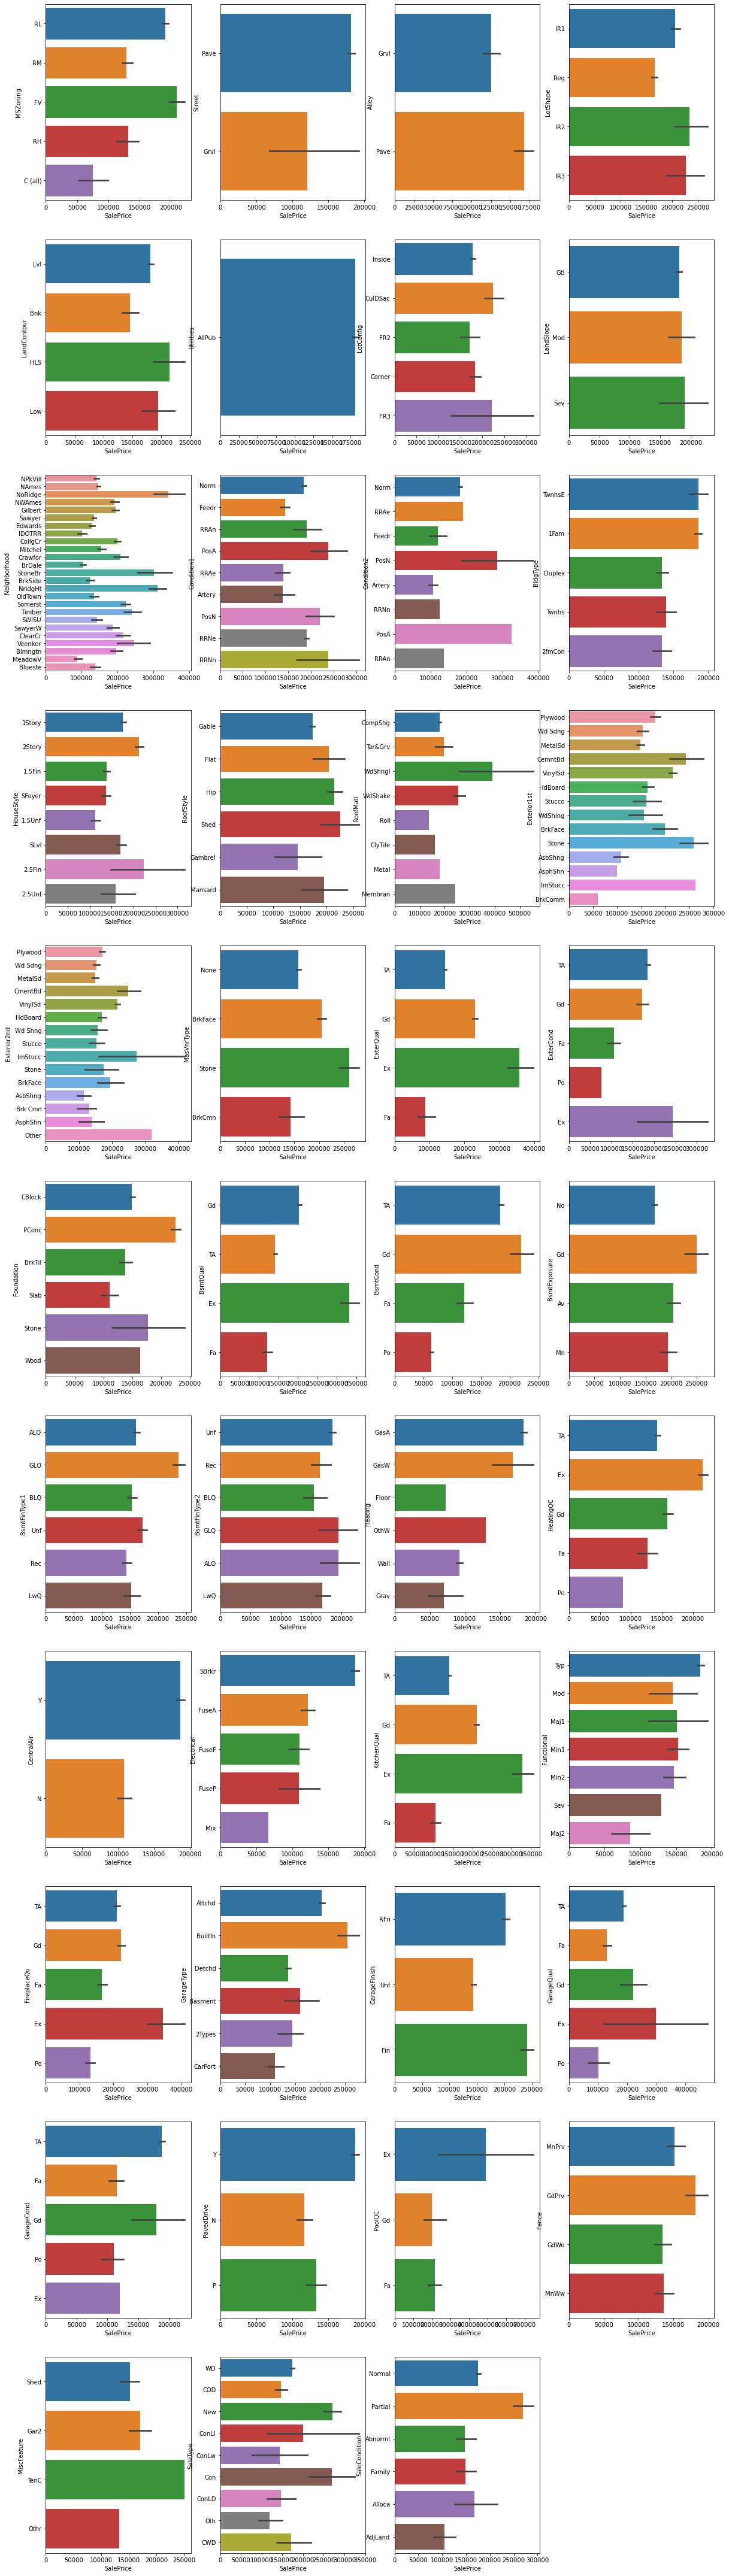

In [34]:
plt.figure(figsize=(20,100))
for i in enumerate(categorical_data): 
    ax = plt.subplot(14, 4, i[0]+1)
    plt.subplots_adjust(wspace = 0.2, hspace = 0.2)
    sns.barplot(x = 'SalePrice', y = i[1], data = df)


Bi-Variant Analysis of Continuous Data Against Traget Variable

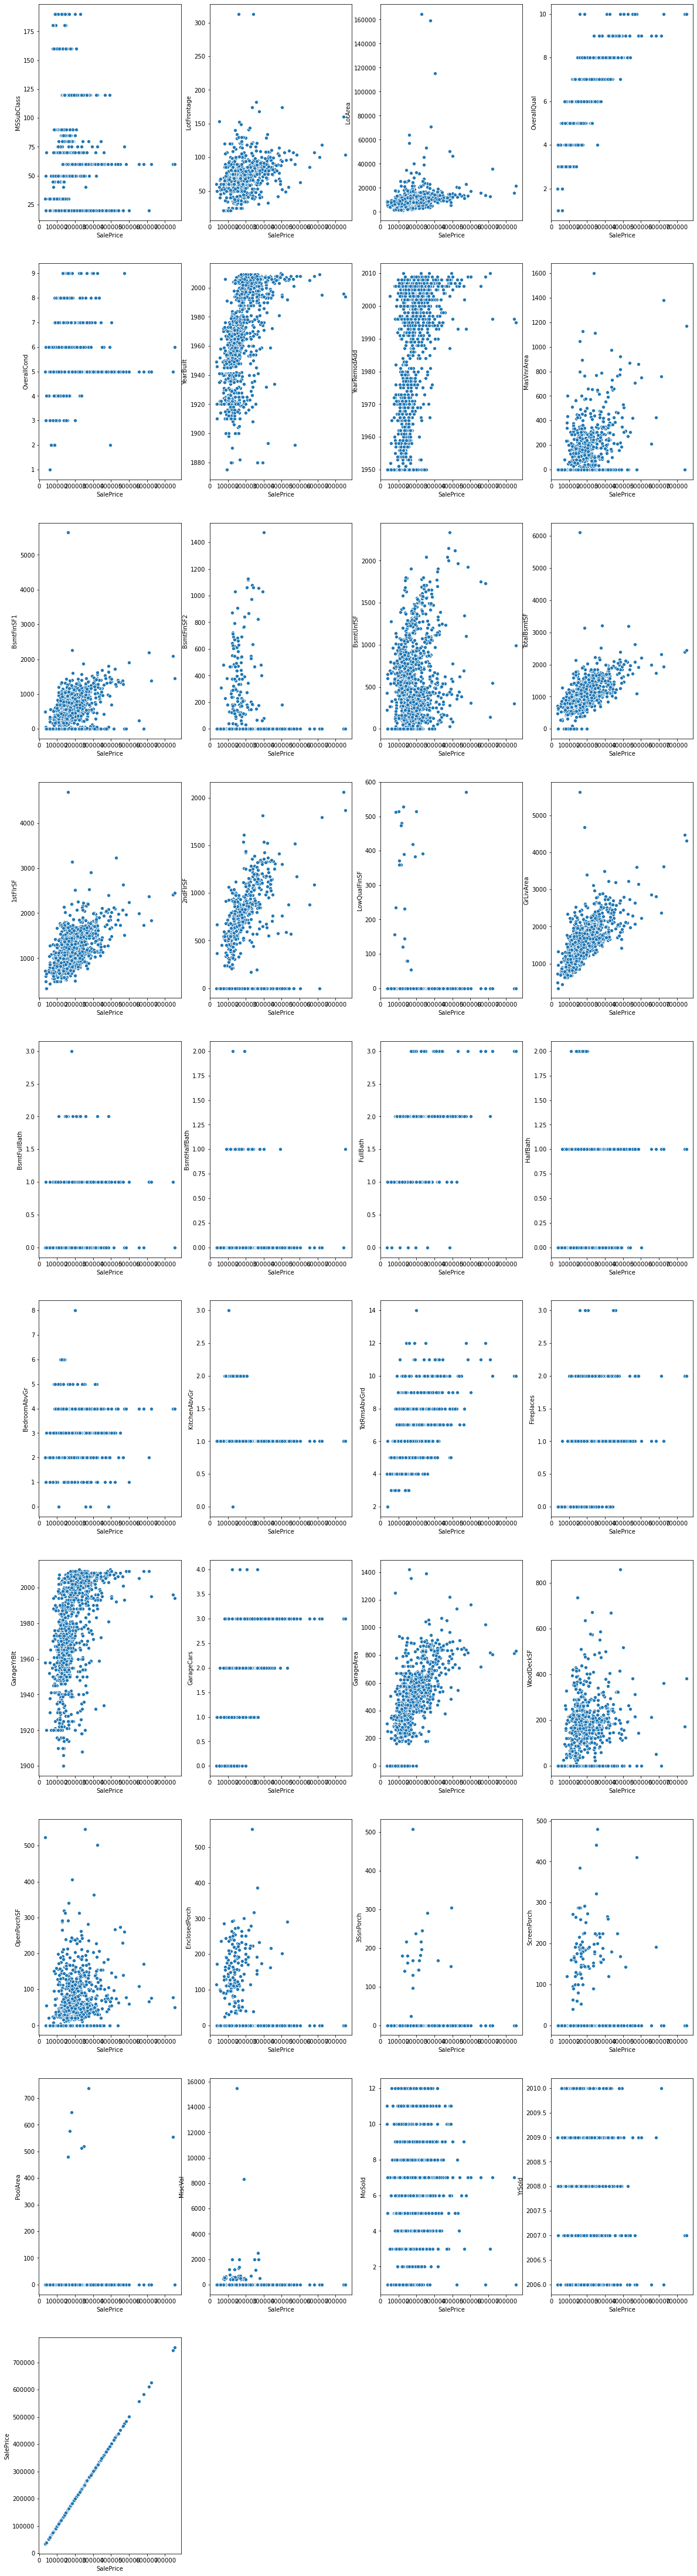

In [36]:
plt.figure(figsize = (20,80))
for i in enumerate(numerical_data): 
    ax = plt.subplot(10,4, i[0]+1)
    sns.scatterplot(x='SalePrice', y = i[1], data=df)

Data Cleaning

In [39]:
# Percentage of null values
round((df.isnull().sum()/len(df.index)) * 100, 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      18.32
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

In [40]:
#Replacing the values as per Data Dictionary

values_to_replace = {
    'Alley': 'No alley Access',
    'MasVnrType': 'None',
    'MasVnrArea': 0.0,
    'BsmtQual': 'No Basement',
    'BsmtCond': 'No Basement',
    'BsmtExposure': 'No Basement',
    'BsmtFinType1': 'No Basement',
    'BsmtFinType2': 'No Basement',
    'FireplaceQu': 'No Fireplace',
    'GarageType': 'No Garage',
    'GarageFinish': 'No Garage',
    'GarageQual': 'No Garage',
    'GarageCond': 'No Garage',
    'PoolQC': 'No Pool',
    'Fence': 'No Fence',
    'MiscFeature': 'None'
}
df.fillna(value = values_to_replace, inplace=True)
round((df.isnull().sum()/len(df.index)) * 100, 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      18.32
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

In [41]:
#Columns with Null Values

df.isna().any()[lambda x: x]

LotFrontage    True
GarageYrBlt    True
dtype: bool

In [43]:
#LotFrontage variable is with outliers. So, imputing with Median


df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace = True)

In [44]:
#Converting Year based columns into Age and remove the year and month based columns.

year_based_columns = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
today = date.today()

df['ConstructionAge'] = df['YearBuilt'].apply(lambda x: today.year - x)
df['RemodelAge'] = df['YearRemodAdd'].apply(lambda x: today.year - x)
df['GarageAge'] = df['GarageYrBlt'].apply(lambda x: today.year - x)
df['TimeSinceSold'] = df['YrSold'].apply(lambda x: today.year - x)
df.drop(year_based_columns, axis = 1, inplace = True)
round((df.isnull().sum()/len(df.index)) * 100, 2)

Id                 0.00
MSSubClass         0.00
MSZoning           0.00
LotFrontage        0.00
LotArea            0.00
                   ... 
SalePrice          0.00
ConstructionAge    0.00
RemodelAge         0.00
GarageAge          5.48
TimeSinceSold      0.00
Length: 81, dtype: float64

In [54]:
#No Garage as it is a Null Value, so impute with 0

df['GarageAge'].fillna(0, inplace = True)
round((df.isnull().sum()/len(df.index)) * 100, 2)

Id                 0.0
MSSubClass         0.0
MSZoning           0.0
LotFrontage        0.0
LotArea            0.0
                  ... 
SalePrice          0.0
ConstructionAge    0.0
RemodelAge         0.0
GarageAge          0.0
TimeSinceSold      0.0
Length: 80, dtype: float64

In [55]:
#Removing Unnecessary Data

df.drop('Id', axis = 1, inplace = True)


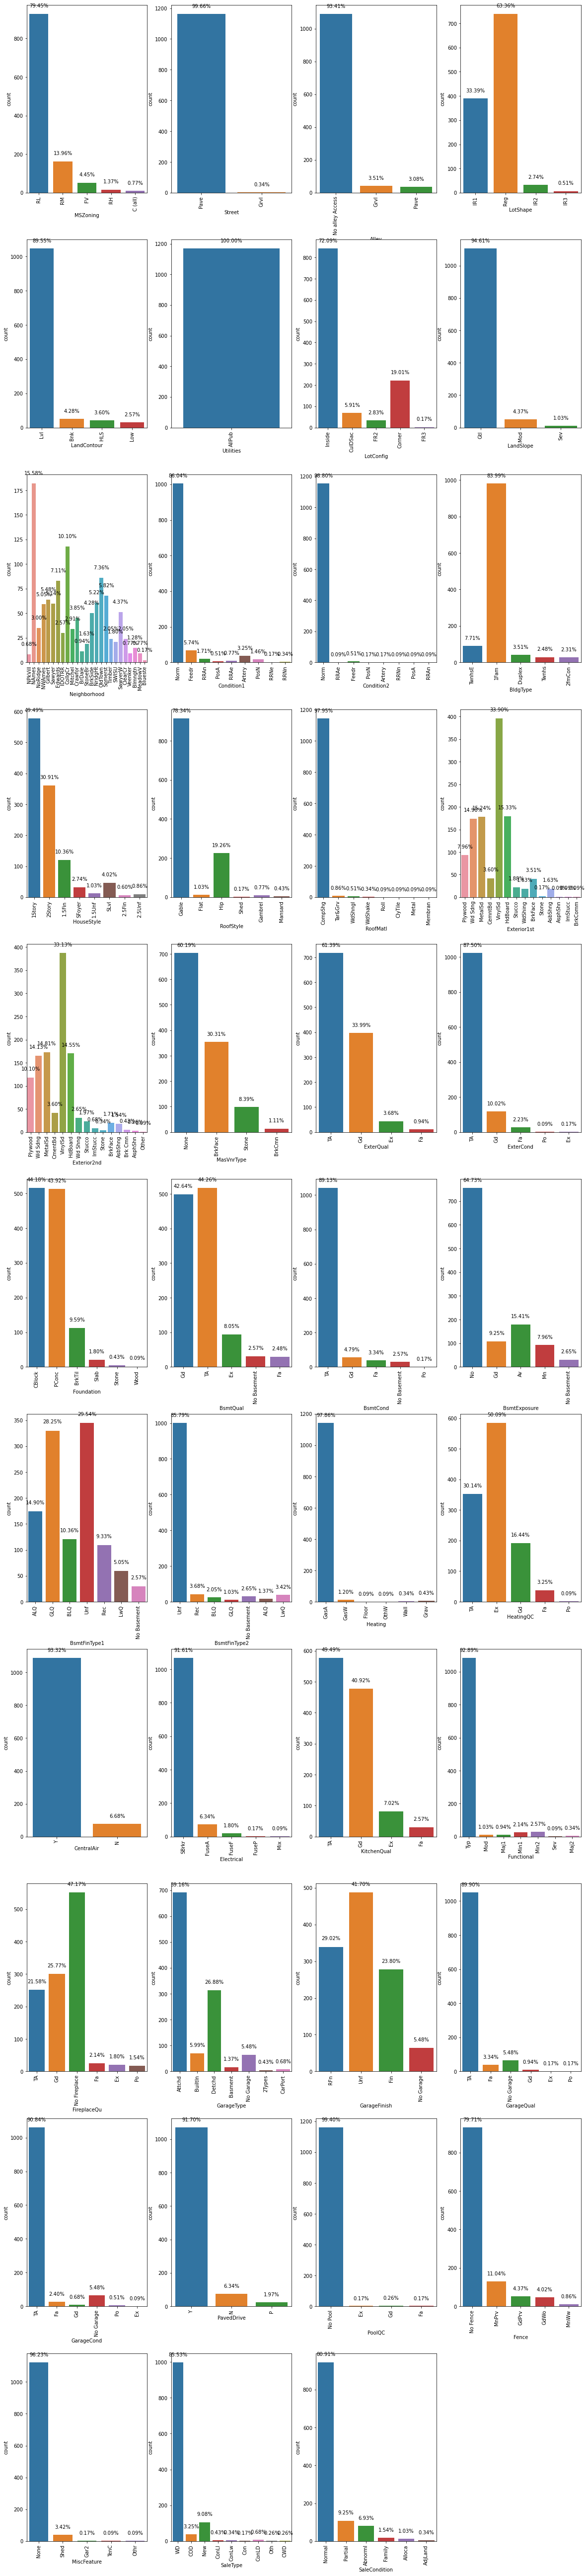

In [56]:
#Plotting Highly skewed Catogorical Variables

plt.figure(figsize=(20, 120))
for i in enumerate(): 
    ax = plt.subplot(14,4, i[0]+1)
    plt.subplots_adjust(wspace = 0.2, hspace = 0.25)
    plt.xticks(rotation="vertical")
    sns.countplot(x=i[1], data=df)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%\n'.format(100 * height/len(df)),
                ha="center")

In [61]:
#Droping Highly skewed Variables

highly_skewed_data = ['Street', 'Alley',  'LandContour', 'BldgType', 'Utilities', 'LandSlope', 
                      'Condition1', 'Condition2', 'RoofMatl', 'ExterCond', 'BsmtCond',
                      'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'KitchenAbvGr', 
                      'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
                      'MiscFeature', 'SaleType', 'SaleCondition', 'BsmtHalfBath']
df.drop(highly_skewed_data, axis = 1, inplace = True)

In [62]:
df.shape

(1168, 53)

Data Preparation for Train and Test

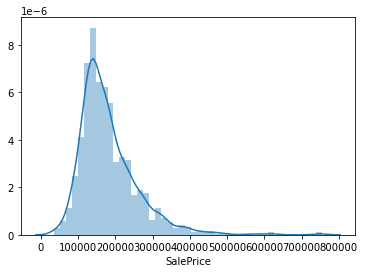

In [64]:
#Analyse SalePrice and Transform

sns.distplot(df['SalePrice'])

As the variable is right skewed, we need to use transformation to make it a normally distributed data. 

In [65]:
#treating the skewness with Square and Cube Root Method

df.skew()
for col in df.skew().index:
    if col in df.describe().columns:
        if df[col].skew()>0.55:
            df[col]=np.sqrt(df[col])
        if df[col].skew()<0.55:
            df[col]=np.cbrt(df[col])

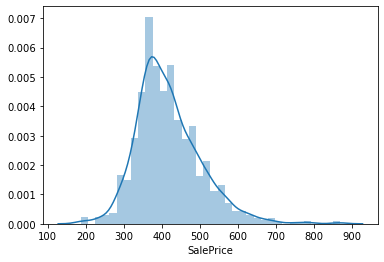

In [66]:
#Normal Distribution of Sales Price

sns.distplot(df['SalePrice'])

In [78]:
#Lable Encoding

from sklearn.preprocessing import LabelEncoder

for val in categorical_data1:
    le=LabelEncoder()
    df[val]=le.fit_transform(df[val].astype(str))

In [77]:
#Categorical Data Need to be encoded after Droping Variables

categorical_data1 = ['MSZoning','LotShape','LotConfig','Neighborhood', 'HouseStyle', 'RoofStyle','Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual','FireplaceQu', 'GarageType', 'GarageFinish']

In [79]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(1168, 53)

In [85]:
#Assigning the Variables

x = df.drop('SalePrice', axis = 1)
x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,ConstructionAge,RemodelAge,GarageAge,TimeSinceSold
0,10.954451,3,8.366600,70.199715,0,4,5,2,1.817121,1.307660,...,14.317821,0.0,0.0,0.00000,0.0,0.0,1.885973,3.556893,1.878922,2.410142
1,4.472136,3,9.746794,125.956342,0,4,4,2,2.000000,1.348006,...,14.387495,0.0,0.0,14.96663,0.0,0.0,1.925728,3.708430,1.925728,2.410142
2,7.745967,3,9.591663,99.599197,0,1,7,5,1.912931,1.307660,...,11.401754,0.0,0.0,0.00000,0.0,0.0,1.709976,2.884499,1.698381,2.410142
3,4.472136,3,10.246951,108.402030,0,4,6,2,1.817121,1.348006,...,11.045361,0.0,0.0,0.00000,0.0,0.0,1.878922,3.530348,1.878922,2.223980
4,4.472136,3,8.366600,128.976742,0,2,6,2,1.817121,1.383088,...,0.000000,0.0,0.0,0.00000,0.0,0.0,1.878922,2.758924,1.878922,2.289428


In [86]:
y = df.SalePrice
y.head()

0    357.770876
1    517.687164
2    519.413130
3    435.889894
4    463.680925
Name: SalePrice, dtype: float64

In [87]:
# Power Transfermation using Yeo Jhonson

from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 1.37446328, -0.16245555,  0.05827203, ...,  0.66891771,
         0.2880594 ,  0.59176867],
       [-1.16611163, -0.16245555,  1.12536937, ...,  0.87124719,
         0.51039031,  0.59176867],
       [ 0.48690988, -0.16245555,  1.00760442, ..., -0.38086151,
        -0.45154292,  0.59176867],
       ...,
       [ 1.70732716, -0.16245555, -2.86664971, ...,  0.66891771,
         0.32069538, -0.90644939],
       [ 0.6948638 , -2.92646435, -0.98789305, ...,  1.39436292,
         1.82910467, -0.17120377],
       [ 0.48690988, -0.16245555,  0.05827203, ..., -0.87794569,
        -0.67567385,  1.38189643]])

In [88]:
#Scaling using StandardScaler

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_t=sc.fit_transform(x)
x_t

array([[ 1.37446328, -0.16245555,  0.05827203, ...,  0.66891771,
         0.2880594 ,  0.59176867],
       [-1.16611163, -0.16245555,  1.12536937, ...,  0.87124719,
         0.51039031,  0.59176867],
       [ 0.48690988, -0.16245555,  1.00760442, ..., -0.38086151,
        -0.45154292,  0.59176867],
       ...,
       [ 1.70732716, -0.16245555, -2.86664971, ...,  0.66891771,
         0.32069538, -0.90644939],
       [ 0.6948638 , -2.92646435, -0.98789305, ...,  1.39436292,
         1.82910467, -0.17120377],
       [ 0.48690988, -0.16245555,  0.05827203, ..., -0.87794569,
        -0.67567385,  1.38189643]])

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [93]:
max_scr=0
for i in range(0,10):
    x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round (r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At Random State",i,". The Model Is Performing Very Well")
        print("At Random State:-",i)
        print("Training r2_score is",r2_score(y_train,pred_train)*100)
        print("Testing r2_score is",r2_score(y_test,pred_test)*100)

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=0.20,random_state=175) #Random state = 20

Regularlisation - Lasso

In [97]:
from sklearn.linear_model import Lasso
parameters ={'alpha':[.00001,.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [114]:
ls=Lasso(alpha= 1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
for j in range(2,10):
    lsscore = cross_val_score(ls,x_t,y,cv=j)
    lsc=lsscore.mean()
    print("At CV :-",j)
    print("Cross Validation Score is :-",lsc*100)
    print ("R2_score is :-",lss*100)
    print('\n')

At CV :- 2
Cross Validation Score is :- 82.01724783425186
R2_score is :- 81.94951090719589


At CV :- 3
Cross Validation Score is :- 83.85560698833768
R2_score is :- 81.94951090719589


At CV :- 4
Cross Validation Score is :- 84.37459807102712
R2_score is :- 81.94951090719589


At CV :- 5
Cross Validation Score is :- 83.98664264500466
R2_score is :- 81.94951090719589


At CV :- 6
Cross Validation Score is :- 84.60727816859101
R2_score is :- 81.94951090719589


At CV :- 7
Cross Validation Score is :- 83.64122153907746
R2_score is :- 81.94951090719589


At CV :- 8
Cross Validation Score is :- 84.54078537688727
R2_score is :- 81.94951090719589


At CV :- 9
Cross Validation Score is :- 83.51175604932222
R2_score is :- 81.94951090719589




In [115]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print("Error:")
print("Mean Absolute Error:",mean_absolute_error(y_test,pred_ls))
print("Mean Square Error:",mean_squared_error(y_test,pred_ls))
print("Root Mean Sqaured Error:", np.sqrt(mean_squared_error(y_test,pred_ls)))

Error:
Mean Absolute Error: 24.055021996628973
Mean Square Error: 1509.5467893414955
Root Mean Sqaured Error: 38.85288649948026


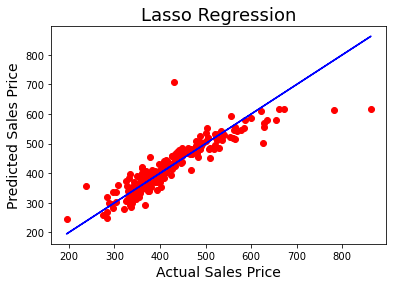

In [116]:
plt.figure(figsize=(6,4))
plt.scatter(x=y_test,y=pred_ls,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Sales Price',fontsize=14)
plt.ylabel('Predicted Sales Price',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

Data Point is intracting with the predicted line

Ridge Regression



In [113]:
from sklearn.linear_model import Ridge
parameters ={'alpha':[.0001,.001,.01,.1,1],'fit_intercept':[True,False],'normalize':[True,False],'random_state':[1,2,3,4,5,6,7,8,9]}
rd=Ridge()
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'alpha': 0.1, 'fit_intercept': True, 'normalize': True, 'random_state': 1}


In [117]:
ridge=Ridge(alpha=0.1,random_state=1,fit_intercept=True,normalize= True)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_rd=rd.predict(x_test)

rdd=r2_score(y_test,pred_rd)
for j in range(2,10):
    rdscore = cross_val_score(rd,x_t,y,cv=j)
    rdc=rdscore.mean()
    print("At CV :-",j)
    print("Cross Validation Score is :-",rdc*100)
    print ("R2_score is :-",rdc*100)
    print('\n')

At CV :- 2
Cross Validation Score is :- 81.02019815269158
R2_score is :- 81.02019815269158


At CV :- 3
Cross Validation Score is :- 82.97375944166127
R2_score is :- 82.97375944166127


At CV :- 4
Cross Validation Score is :- 83.74827210339646
R2_score is :- 83.74827210339646


At CV :- 5
Cross Validation Score is :- 83.23837871480336
R2_score is :- 83.23837871480336


At CV :- 6
Cross Validation Score is :- 84.1112880748324
R2_score is :- 84.1112880748324


At CV :- 7
Cross Validation Score is :- 82.87979712721597
R2_score is :- 82.87979712721597


At CV :- 8
Cross Validation Score is :- 84.05264920417497
R2_score is :- 84.05264920417497


At CV :- 9
Cross Validation Score is :- 82.65811599734735
R2_score is :- 82.65811599734735




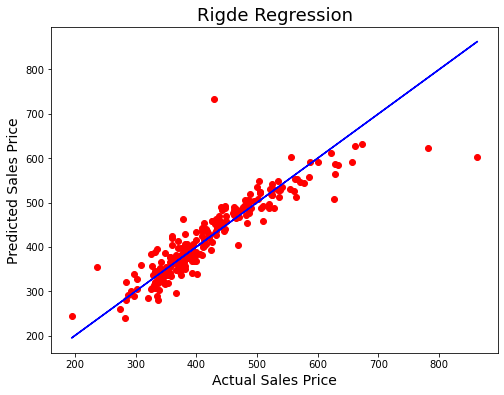

In [122]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_rd,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Sales Price',fontsize=14)
plt.ylabel('Predicted Sales Price',fontsize=14)
plt.title('Rigde Regression',fontsize=18)
plt.show()

Same as Lasso Model all Data points are interacting with the predictd line

Ensemblier Technique - Decision Tree

In [119]:
from sklearn.tree import DecisionTreeRegressor
parameters={'criterion':['mse','friedman_mse','mse'],'splitter':['best','random']}
dt=DecisionTreeRegressor()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'criterion': 'friedman_mse', 'splitter': 'best'}


In [120]:
dt=DecisionTreeRegressor(criterion='friedman_mse', splitter='best')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_decision=dt.predict(x_test)
dts=r2_score(y_test,pred_decision)
print("r2_score:",dts*100)
dtscore = cross_val_score(dt,x_t,y,cv=3)
dtc=dtscore.mean()
print('Cross Val Score:',dtc*100)

r2_score: 72.62640029711788
Cross Val Score: 71.75780182094047


In [121]:
print("Error:")
print("Mean Absolute Error:",round(mean_absolute_error(y_test,pred_decision),2))
print("Mean Square Error:",round(mean_squared_error(y_test,pred_decision),2))
print("Root Mean Sqaured Error:",round(np.sqrt(mean_squared_error(y_test,pred_decision)),2))

Error:
Mean Absolute Error: 33.18
Mean Square Error: 2289.23
Root Mean Sqaured Error: 47.85


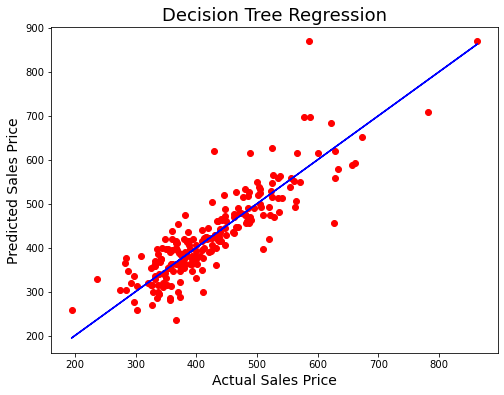

In [123]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_decision,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Sales Price',fontsize=14)
plt.ylabel('Predicted Sales Price',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

Very Less Data Points Are Intracting with the predicted Line

Random Forest

In [124]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','friedman_mse','mse'],'n_estimators':[100,200,300]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'criterion': 'mse', 'n_estimators': 200}


In [125]:
rf=RandomForestRegressor(criterion='mse', n_estimators= 200)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_rd=rf.predict(x_test)
rfs=r2_score(y_test,pred_rd)
print("r2_score:",rfs*100)
rfscore = cross_val_score(rf,x_t,y,cv=3)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

r2_score: 84.12854409661657
Cross Val Score: 86.93454680203506


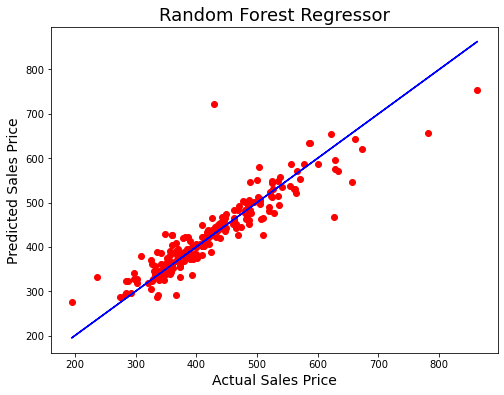

In [127]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_rd,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Sales Price',fontsize=14)
plt.ylabel('Predicted Sales Price',fontsize=14)
plt.title('Random Forest Regressor',fontsize=18)
plt.show()

More Data points are intracting with the predicted lines when compare with above models

Gradient Bosster Regressor

In [128]:
from sklearn.ensemble import GradientBoostingRegressor
parameters={'loss':['ls','lad','huber','quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse','mse']}
gbr=GradientBoostingRegressor()
clf=GridSearchCV(gbr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'criterion': 'mse', 'loss': 'huber', 'n_estimators': 100}


In [129]:
gbr=GradientBoostingRegressor(criterion='mse', loss='huber',n_estimators=100)
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)
pred_random=gbr.predict(x_test)
gbrs=r2_score(y_test,pred_random)
print("r2_score:",round(gbrs*100,2))
gbscore = cross_val_score(gbr,x_t,y,cv=3)
gbrc=gbscore.mean()
print('Cross Val Score:',round(gbrc*100,2))


r2_score: 84.83
Cross Val Score: 88.55


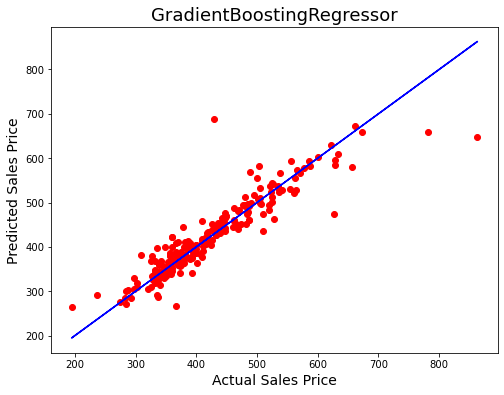

In [130]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_random,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Sales Price',fontsize=14)
plt.ylabel('Predicted Sales Price',fontsize=14)
plt.title('GradientBoostingRegressor',fontsize=18)
plt.show()


Most of data points are interacting with predicted line

In [131]:
from sklearn.svm import SVR
parameters = {'kernel':['linear','poly','rbf','sigmoid']}
sv=SVR()
clf=GridSearchCV(sv,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'kernel': 'linear'}


In [132]:
sv=SVR(kernel='linear',gamma='auto')
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
pred_vector=sv.predict(x_test)
svs=r2_score(y_test,pred_vector)
print("r2_score:",round(svs*100,2))
svscore = cross_val_score(sv,x_t,y,cv=3)
svc=svscore.mean()
print('Cross Val Score:',round(svc*100,2))


r2_score: 82.38
Cross Val Score: 84.72


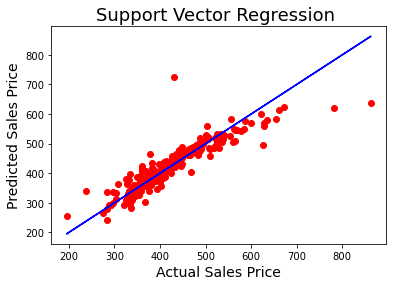

In [134]:
plt.figure(figsize=(6,4))
plt.scatter(x=y_test,y=pred_vector,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Sales Price',fontsize=14)
plt.ylabel('Predicted Sales Price',fontsize=14)
plt.title('Support Vector Regression ',fontsize=18)
plt.show()

Testing

In [135]:
a=np.array(y_test)
a

array([445.5333882 , 386.00518131, 634.03469937, 447.2135955 ,
       384.70768123, 274.77263328, 479.58315233, 484.76798574,
       339.11649916, 288.09720582, 429.82554601, 360.55512755,
       460.43457733, 415.93268686, 556.77643628, 350.        ,
       469.04157598, 374.16573868, 437.03546767, 415.33119315,
       554.07580709, 535.80780136, 507.44457825, 381.9685851 ,
       358.0502758 , 528.67759552, 441.02154142, 433.58966777,
       356.37059362, 401.87062595, 400.        , 194.67922334,
       484.76798574, 282.84271247, 438.74821937, 372.82703765,
       430.69710935, 374.16573868, 328.6335345 , 434.74130239,
       344.23828956, 449.2215489 , 626.0990337 , 356.37059362,
       465.29560497, 369.45906404, 371.48351242, 523.45009313,
       292.40383034, 372.82703765, 468.508271  , 370.13511047,
       338.37848631, 524.40442409, 342.05262753, 488.87626246,
       412.31056256, 501.99601592, 339.11649916, 356.37059362,
       489.38737213, 399.93749512, 375.49966711, 479.58

In [137]:
df_com=pd.DataFrame({"Original":a,"Predicted":pred_random},index=range(len(a)))
df_com

,Original,Predicted
0,445.533388,456.470133
1,386.005181,412.507158
2,634.034699,609.320625
3,447.213595,441.713249
4,384.707681,395.261946
...,...,...
229,384.707681,399.472579
230,349.284984,350.070041
231,534.789678,537.692782
232,488.876262,568.300412


In [141]:
import pickle
filename='Project_HomePrice_Prediction.pkl'
pickle.dump(gbr,open(filename,'wb'))